In [1]:
from cmath import atan
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean

data_file = "../data/stock_returns.pkl"
data = pd.read_pickle(data_file)

## 空数据比例

In [129]:
# count the number of zeros on each day
import torch
from datetime import date, timedelta

hist = []
start_date = date(2000, 1, 5)
end_date   = date(2024, 1, 1)

for merge_to_min in range(1,6):
    zero_hist  = pd.DataFrame()
    new_dim = 240 // merge_to_min
    converter = torch.eye(new_dim, dtype=torch.int).repeat_interleave(merge_to_min).reshape(new_dim,-1)

    # iterate through dates
    for i in range((end_date - start_date).days):
        date = start_date + timedelta(i)
        today = data.loc[date.strftime('%Y-%m-%d')]

        if len(today) == 240: # skip invalid days
            # convert today to a pytorch tensor and count the number of zeros
            today = torch.tensor((today == 0).values, dtype=torch.int)
            r_zeros = torch.sum((converter @ today).eq(1)).item() / today.numel()
            new_zero = pd.DataFrame({'zero_ratio': r_zeros}, index=[date.strftime("%Y-%m-%d")] )
            zero_hist = pd.concat([zero_hist, new_zero])

    hist.append(zero_hist)

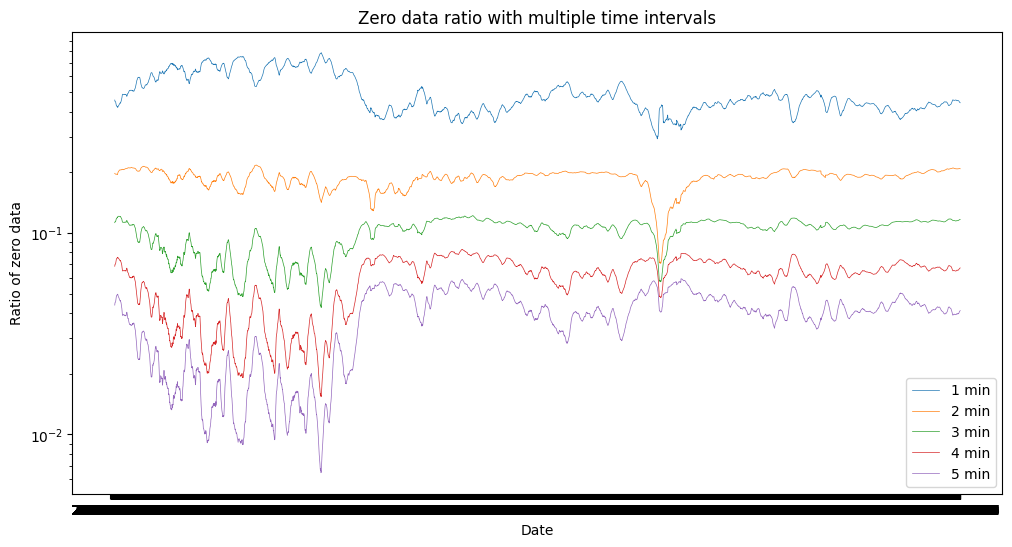

In [134]:
plt.figure(figsize=(12, 6))

for i, zero_hist in enumerate(hist):
    plt.plot(zero_hist.rolling(30).mean(), label=f"{i+1} min", linewidth=0.5)

plt.grid(True)
plt.yscale('log')
plt.legend()
plt.title('Zero data ratio with multiple time intervals')
plt.xlabel('Date')
plt.ylabel('Ratio of zero data')
plt.show()

everage % of zeros: 0.4932%


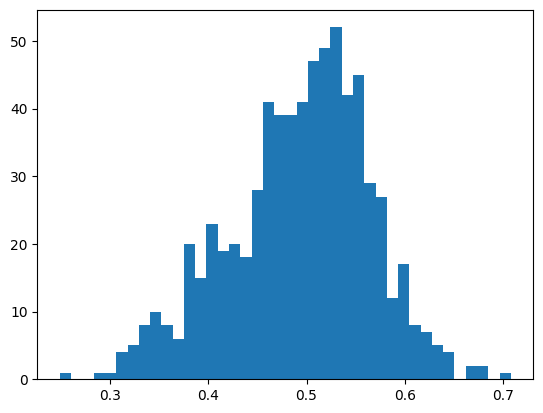

In [2]:
# find % of zeros of each column of data
zeros = []
for col in data.columns:
    zeros.append(len(data[col][data[col] == 0]) / len(data[col]))

# plot histogram of zeros
plt.hist(zeros, bins=40)
print(f"everage % of zeros: {mean(zeros):.4f}%")

## 数据量测试

In [118]:
from datetime import date, timedelta

start_date = date(2000, 1, 4)
end_date   = date(2024, 1, 1)

for i in range((end_date - start_date).days):
    date = start_date + timedelta(i)
    today = data.loc[date.strftime('%Y-%m-%d')]
    if len(today) != 240 and len(today) > 0:
        print(f"date {date} has {len(today)} minutes")

date 2000-01-04 has 239 minutes


date 2023-11-30 has 241 minutes


## 抽样与聚宽数据校验

In [26]:
# list of data's columns
tickers = data.columns

# randomly pick 10 tickers
# sample_tickers = random.sample(list(tickers), 10)
sample_tickers =['600733', '600817', '600782', '000628', '600748', '600208', '600219', '000779', '600699', '600063']
date = ['2000-01-04']

sample_test = data['600733'].loc['2006-01-04':'2006-01-04']
print(f"mean = {sample_test.mean()}")
print(f"std = {sample_test.std()}")
sample_test[:10]


mean = 0.00019829167518661204
std = 0.00606757568234772


trade_time
2006-01-04 09:31:00    0.002941
2006-01-04 09:32:00    0.002933
2006-01-04 09:33:00   -0.002924
2006-01-04 09:34:00    0.000000
2006-01-04 09:35:00    0.000000
2006-01-04 09:36:00    0.000000
2006-01-04 09:37:00    0.002933
2006-01-04 09:38:00    0.000000
2006-01-04 09:39:00    0.000000
2006-01-04 09:40:00   -0.002924
Name: 600733, dtype: float64